In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [14]:
transform = transforms.ToTensor()

mnist_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)

data_loader = torch.utils.data.DataLoader(dataset=mnist_data, batch_size=64, shuffle=True)

In [15]:
dataiter = iter(data_loader)
images, labels = next(dataiter)
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [16]:
class AE(nn.Module):
  def __init__(self):
    super().__init__()
      
    # Building an linear encoder with Linear
    # layer followed by Relu activation function
    # 784 ==> 9
    self.encoder = torch.nn.Sequential(
      torch.nn.Linear(28 * 28, 128),
      torch.nn.ReLU(),
      torch.nn.Linear(128, 64),
      torch.nn.ReLU(),
      torch.nn.Linear(64, 36),
      torch.nn.ReLU(),
      torch.nn.Linear(36, 18),
      torch.nn.ReLU(),
      torch.nn.Linear(18, 9)
    )
      
    # Building an linear decoder with Linear
    # layer followed by Relu activation function
    # The Sigmoid activation function
    # outputs the value between 0 and 1
    # 9 ==> 784
    self.decoder = torch.nn.Sequential(
      torch.nn.Linear(9, 18),
      torch.nn.ReLU(),
      torch.nn.Linear(18, 36),
      torch.nn.ReLU(),
      torch.nn.Linear(36, 64),
      torch.nn.ReLU(),
      torch.nn.Linear(64, 128),
      torch.nn.ReLU(),
      torch.nn.Linear(128, 28 * 28),
      torch.nn.Sigmoid()
    )

  def forward(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

In [23]:
model = AE()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [24]:
num_epochs = 10
outputs = []
for epoch in range (num_epochs):
  for (img, _) in data_loader:
    img = img.reshape(-1, 28*28)
    recon = model(img)
    loss = criterion(recon, img)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  
  print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")
  outputs.append((epoch, img, recon))

Epoch: 1, Loss: 0.0492
Epoch: 2, Loss: 0.0427
Epoch: 3, Loss: 0.0447
Epoch: 4, Loss: 0.0359
Epoch: 5, Loss: 0.0384
Epoch: 6, Loss: 0.0405
Epoch: 7, Loss: 0.0323
Epoch: 8, Loss: 0.0301
Epoch: 9, Loss: 0.0348
Epoch: 10, Loss: 0.0326


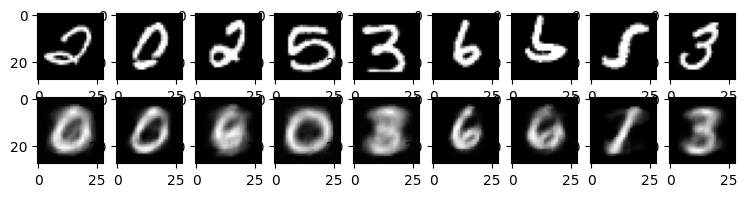

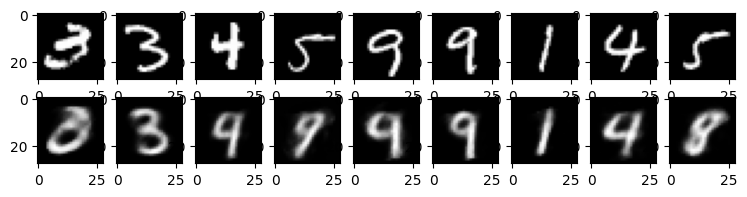

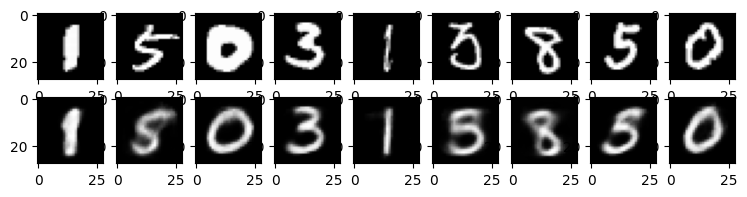

In [25]:
for k in range(0, num_epochs, 4):
  plt.figure(figsize=(9,2))
  plt.gray()
  imgs = outputs[k][1].detach().numpy()
  recon = outputs[k][2].detach().numpy()
  for i, item in enumerate(imgs):
    if i >= 9: break
    plt.subplot(2, 9, i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

  for i, item in enumerate(recon):
    if i >= 9: break
    plt.subplot(2, 9, 9+i+1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])